In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)




In [6]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)      # Input layer to first hidden layer (Complete this part of the code using right dimensions: [2marks]
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)       # First hidden layer to second hidden layer. (Complete this part of the code using the right dimensions: [2marks]
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)       # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)             # Flatten the input tensor
        x = self.relu1(self.fc1(x))                    # Apply activation function on the first layer: [2 marks]
        x = self.relu2(self.fc2(x))                    # Apply activation function on the second layer: [2 marks]
        x = self.fc3(x)                     # Output layer (no activation function here)
        return x

# Instantiate the model
model = MLP()

In [3]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001

In [8]:

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        # Zero the gradients manually
        model.zero_grad()
        
        # Forward pass
        outputs = model(images)# calculate the outputs of your model: hint: call the model that you have defined previously [2 marks]
        loss = criterion(outputs,labels)# compute the loss: hint: call the loss function that you have defined previously [2 marks]
        

        # Backward pass
        loss.backward()
        # perform backward pass [2 marks]
        
        # Update weights manually
        with torch.no_grad():
            for param in model.parameters():
                param.data += learning_rate*-param.grad
                # update your parameters using gradient descent [2 marks]
                
        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 1/5, Loss: 2.2031
Epoch 2/5, Loss: 1.8730
Epoch 3/5, Loss: 1.3658
Epoch 4/5, Loss: 0.9642
Epoch 5/5, Loss: 0.7399


In [9]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 83.96%


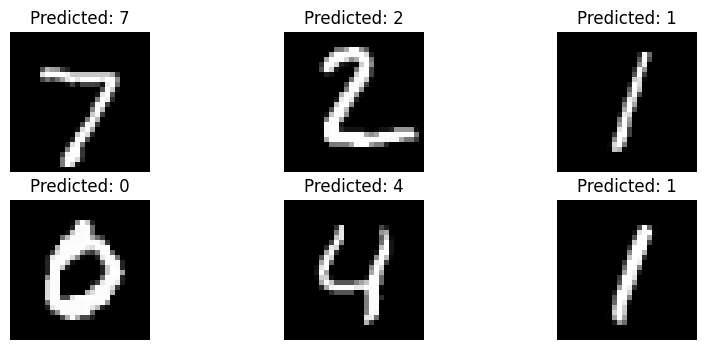

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data from the testloader
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of .next()

# Pass images through the model to get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images and predictions
fig = plt.figure(figsize=(10, 4))
for idx in range(6):
    ax = fig.add_subplot(2, 3, idx + 1)
    img = images[idx].numpy().squeeze()  # Squeeze to remove unnecessary dimensions
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'Predicted: {predicted[idx].item()}')
    ax.axis('off')  # Turn off axis labels
plt.show()

Changing Learning Rate

In [17]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 256)      # Input layer to first hidden layer (Complete this part of the code using right dimensions: [2marks]
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)       # First hidden layer to second hidden layer. (Complete this part of the code using the right dimensions: [2marks]
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)       # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)             # Flatten the input tensor
        x = self.relu1(self.fc1(x))                    # Apply activation function on the first layer: [2 marks]
        x = self.relu2(self.fc2(x))                    # Apply activation function on the second layer: [2 marks]
        x = self.fc3(x)                     # Output layer (no activation function here)
        return x

# Instantiate the model
model = MLP()

In [18]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.01

In [34]:

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        # Zero the gradients manually
        model.zero_grad()
        
        # Forward pass
        outputs = model(images)# calculate the outputs of your model: hint: call the model that you have defined previously [2 marks]
        loss = criterion(outputs,labels)# compute the loss: hint: call the loss function that you have defined previously [2 marks]
        

        # Backward pass
        loss.backward()
        # perform backward pass [2 marks]
        
        # Update weights manually
        with torch.no_grad():
            for param in model.parameters():
                param.data += learning_rate*-param.grad
                # update your parameters using gradient descent [2 marks]
                
        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 1/5, Loss: 0.2534
Epoch 2/5, Loss: 0.2496
Epoch 3/5, Loss: 0.2466
Epoch 4/5, Loss: 0.2440
Epoch 5/5, Loss: 0.2414


In [22]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 93.12%


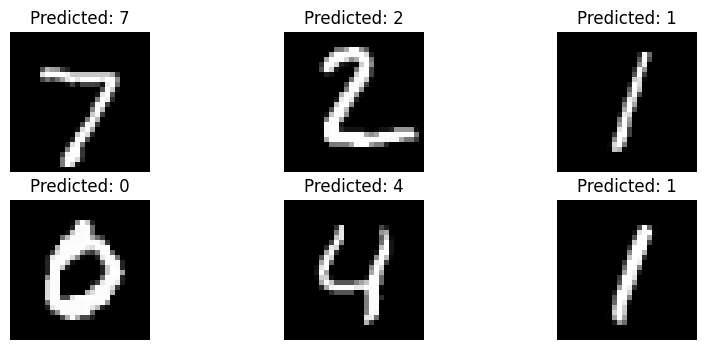

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data from the testloader
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of .next()

# Pass images through the model to get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images and predictions
fig = plt.figure(figsize=(10, 4))
for idx in range(6):
    ax = fig.add_subplot(2, 3, idx + 1)
    img = images[idx].numpy().squeeze()  # Squeeze to remove unnecessary dimensions
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'Predicted: {predicted[idx].item()}')
    ax.axis('off')  # Turn off axis labels
plt.show()

Adjusting Model Architecture

In [29]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 50)      # Input layer to first hidden layer (Complete this part of the code using right dimensions: [2marks]
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 128)       # First hidden layer to second hidden layer. (Complete this part of the code using the right dimensions: [2marks]
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 25)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(25, 10)       # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)             # Flatten the input tensor
        x = self.relu1(self.fc1(x))                    # Apply activation function on the first layer: [2 marks]
        x = self.relu2(self.fc2(x))                    # Apply activation function on the second layer: [2 marks]
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)                     # Output layer (no activation function here)
        return x

# Instantiate the model
model = MLP()

In [33]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001

In [35]:

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        # Zero the gradients manually
        model.zero_grad()
        
        # Forward pass
        outputs = model(images)# calculate the outputs of your model: hint: call the model that you have defined previously [2 marks]
        loss = criterion(outputs,labels)# compute the loss: hint: call the loss function that you have defined previously [2 marks]
        

        # Backward pass
        loss.backward()
        # perform backward pass [2 marks]
        
        # Update weights manually
        with torch.no_grad():
            for param in model.parameters():
                param.data += learning_rate*-param.grad
                # update your parameters using gradient descent [2 marks]
                
        running_loss += loss.item()
    avg_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')

Epoch 1/5, Loss: 0.2386
Epoch 2/5, Loss: 0.2361
Epoch 3/5, Loss: 0.2337
Epoch 4/5, Loss: 0.2311
Epoch 5/5, Loss: 0.2289


In [36]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 93.31%


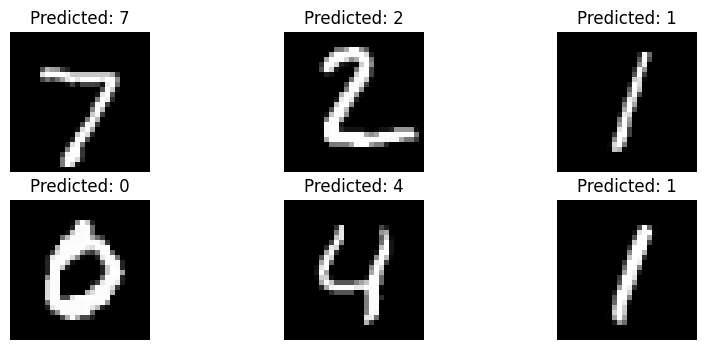

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data from the testloader
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of .next()

# Pass images through the model to get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images and predictions
fig = plt.figure(figsize=(10, 4))
for idx in range(6):
    ax = fig.add_subplot(2, 3, idx + 1)
    img = images[idx].numpy().squeeze()  # Squeeze to remove unnecessary dimensions
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'Predicted: {predicted[idx].item()}')
    ax.axis('off')  # Turn off axis labels
plt.show()

Different Activation Functions 

In [72]:
class MLP_Tanh(nn.Module):
    def __init__(self):
        super(MLP_Tanh, self).__init__()
        self.fc1 = nn.Linear(784, 256)      # Input layer to first hidden layer (Complete this part of the code using right dimensions: [2marks]
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(256, 128)       # First hidden layer to second hidden layer. (Complete this part of the code using the right dimensions: [2marks]
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(128, 10)       # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)             # Flatten the input tensor
        x = self.tanh1(self.fc1(x))                    # Apply activation function on the first layer: [2 marks]
        x = self.tanh2(self.fc2(x))                    # Apply activation function on the second layer: [2 marks]
        x = self.fc3(x)                     # Output layer (no activation function here)
        return x
    
class MLP_Sigmoid(nn.Module):
    def __init__(self):
        super(MLP_Sigmoid, self).__init__()
        self.fc1 = nn.Linear(784, 256)      # Input layer to first hidden layer (Complete this part of the code using right dimensions: [2marks]
        self.sigmoid1 = nn.Sigmoid()
        self.fc2 = nn.Linear(256, 128)       # First hidden layer to second hidden layer. (Complete this part of the code using the right dimensions: [2marks]
        self.sigmoid2 = nn.Sigmoid()
        self.fc3 = nn.Linear(128, 10)       # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)             # Flatten the input tensor
        x = self.sigmoid1(self.fc1(x))                    # Apply activation function on the first layer: [2 marks]
        x = self.sigmoid2(self.fc2(x))                    # Apply activation function on the second layer: [2 marks]
        x = self.fc3(x)                     # Output layer (no activation function here)
        return x



In [82]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.001 


In [83]:
# Instantiate the model
model_tanh = MLP_Tanh()
model_sigmoid = MLP_Sigmoid()
epochs = 5

for epoch in range(epochs):
    running_loss_t = 0.0
    running_loss_s = 0.0
    for images, labels in trainloader:
        # Zero the gradients manually
        model_tanh.zero_grad()
        model_sigmoid.zero_grad()
        
        # Forward pass
        outputs_t = model_tanh(images)# calculate the outputs of your model: hint: call the model that you have defined previously [2 marks]
        outputs_s = model_sigmoid(images)
        loss_t = criterion(outputs_t,labels)# compute the loss: hint: call the loss function that you have defined previously [2 marks]
        loss_s = criterion(outputs_s, labels)
        

        # Backward pass
        loss_t.backward()
        loss_s.backward()
        # perform backward pass [2 marks]
        
        # Update weights manually
        with torch.no_grad():
            for param in model_tanh.parameters():
                param.data += -learning_rate*param.grad
                # update your parameters using gradient descent [2 marks]

        with torch.no_grad():
            for param2 in model_sigmoid.parameters():
                param2.data += -learning_rate*param2.grad
                
        running_loss_t += loss_t.item()
        running_loss_s += loss_s.item()

    avg_loss_t = running_loss_t / len(trainloader)
    avg_loss_s = running_loss_s / len(trainloader)
    print(f'Tanh: Epoch {epoch + 1}/{epochs}, Loss: {avg_loss_t:.4f}')
    print(f'Sigmoid: Epoch {epoch +1}/{epochs}, Loss: {avg_loss_s:.4f}')

Tanh: Epoch 1/5, Loss: 2.0957
Sigmoid: Epoch 1/5, Loss: 2.3032
Tanh: Epoch 2/5, Loss: 1.6048
Sigmoid: Epoch 2/5, Loss: 2.2993
Tanh: Epoch 3/5, Loss: 1.1715
Sigmoid: Epoch 3/5, Loss: 2.2970
Tanh: Epoch 4/5, Loss: 0.9027
Sigmoid: Epoch 4/5, Loss: 2.2948
Tanh: Epoch 5/5, Loss: 0.7433
Sigmoid: Epoch 5/5, Loss: 2.2924


In [84]:
correct_t = 0
correct_s = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs_t = model_tanh(images)
        outputs_s = model_sigmoid(images)
        _, predicted_t = torch.max(outputs_t.data, 1)
        _, predicted_s = torch.max(outputs_s.data, 1)
        total += labels.size(0)
        correct_t += (predicted_t == labels).sum().item()
        correct_s += (predicted_s == labels).sum().item()

accuracy_t = 100 * correct_t / total
accuracy_s = 100 * correct_s / total
print(f'Tanh Test Accuracy: {accuracy_t:.2f}%')
print(f'Sigmoid Test Accuracy: {accuracy_s:.2f}%')


Tanh Test Accuracy: 84.69%
Sigmoid Test Accuracy: 11.35%


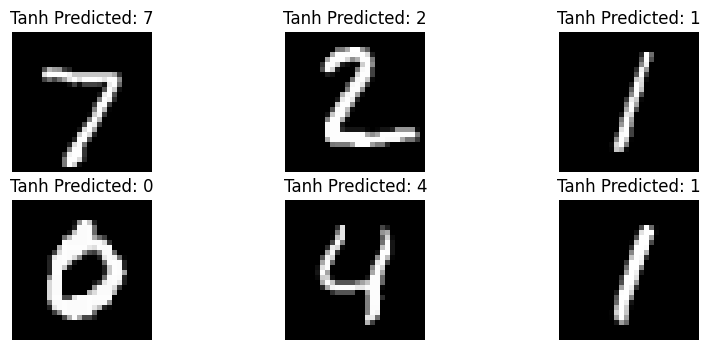

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data from the testloader
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of .next()

# Pass images through the model to get predictions
outputs = model_tanh(images)
_, predicted = torch.max(outputs, 1)

# Display images and predictions
fig = plt.figure(figsize=(10, 4))
for idx in range(6):
    ax = fig.add_subplot(2, 3, idx + 1)
    img = images[idx].numpy().squeeze()  # Squeeze to remove unnecessary dimensions
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'Tanh Predicted: {predicted[idx].item()}')
    ax.axis('off')  # Turn off axis labels
plt.show()

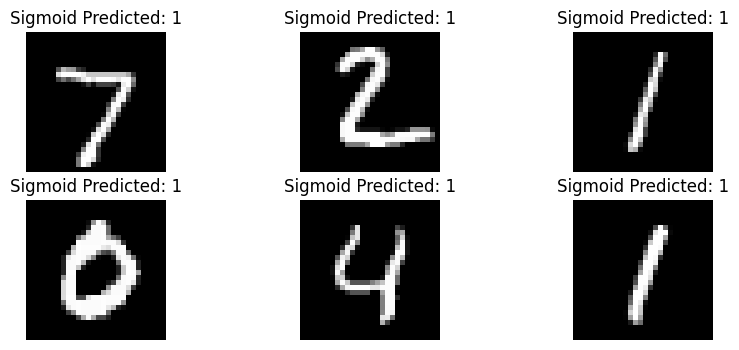

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data from the testloader
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of .next()

# Pass images through the model to get predictions
outputs = model_sigmoid(images)
_, predicted = torch.max(outputs, 1)

# Display images and predictions
fig = plt.figure(figsize=(10, 4))
for idx in range(6):
    ax = fig.add_subplot(2, 3, idx + 1)
    img = images[idx].numpy().squeeze()  # Squeeze to remove unnecessary dimensions
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'Sigmoid Predicted: {predicted[idx].item()}')
    ax.axis('off')  # Turn off axis labels
plt.show()